In [3]:
import pandas as pd 
pd.set_option('display.max_rows',20)
poti = pd.read_csv('poti.csv')
julijske_alpe = pd.read_csv('julijske_alpe_podrobnosti.csv')

In [9]:
julijske_alpe = julijske_alpe.rename(columns={
    'Name':'Ime',
    'Country':'Država',
    'Mountain Range':'Gorovje',
    'Height(m)':'Višina(m)',
    'Views':'Ogledi',
    'Popularity':'Popularnost',
    'Number of Images':'Število slik',
    'Number of Paths':'Število poti',
    'Number of GPS Paths':'Število označenih poti',
    'Description':'Opis'

})

julijske_alpe[['id','Ime','Država','Gorovje','Višina(m)','Ogledi','Popularnost','Število slik','Število poti','Število označenih poti','Opis']]

,id,Ime,Država,Gorovje,Višina(m),Ogledi,Popularnost,Število slik,Število poti,Število označenih poti,Opis
0,1,Triglav,Slovenija,Julijske Alpe,2864,1841519,100% (1. mesto),42,28,20,"Triglav je 2864 m visoka gora, ki se nahaja v ..."
1,2,Montaž / Jôf di Montasio,Italija,Julijske Alpe,2753,780045,98% (58. mesto),15,3,0,Montaž je ena izmed najmogočnejših in s svojim...
2,3,Škrlatica,Slovenija,Julijske Alpe,2740,867873,99% (42. mesto),23,5,5,Škrlatica je druga najvišja gora v Sloveniji. ...
3,4,Mali Triglav,Slovenija,Julijske Alpe,2725,534798,93% (270. mesto),4,3,2,Mali Triglav je neizrazit vrh v glavnem greben...
4,5,Mangart,"Italija , Slovenija",Julijske Alpe,2679,1026726,100% (18. mesto),26,8,5,"Mangart (tudi Mangrt, obe zapisani obliki sta ..."
...,...,...,...,...,...,...,...,...,...,...,...
581,582,Gregorčičev slap,Slovenija,Julijske Alpe,390,12920,44% (2043. mesto),2,1,0,Opis slapa: Gregorčičev slap je 88 metrov viso...
582,583,Korita Soče pri Kršovcu,Slovenija,Julijske Alpe,390,323358,75% (922. mesto),2,1,0,Soča je na tem mestu izdolbla korita dolga okr...
583,584,Slap Veliki Kozjak,Slovenija,Julijske Alpe,250,440561,86% (525. mesto),3,1,0,Opis slapa: Slap Veliki Kozjak je kljub skromn...
584,585,Slap Mali Kozjak,Slovenija,Julijske Alpe,230,297585,72% (1024. mesto),2,1,0,"Opis slapa: Mali slap Kozjak je manjši slap, k..."


Najprej lahko naredimo graf, ki prikazuje koliko gora je v različnem višinskem rangu.

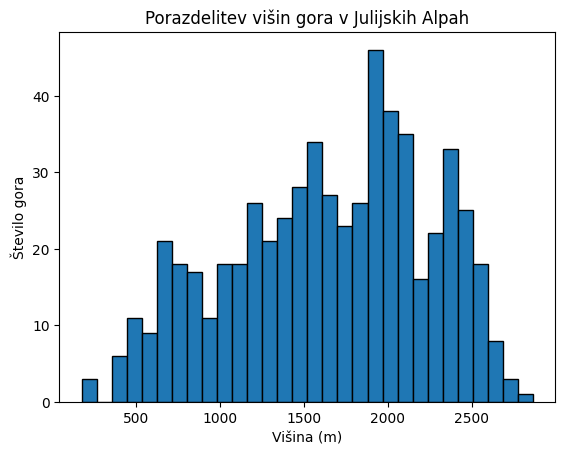

In [12]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("julijske_alpe_podrobnosti.csv")

df["Height(m)"].plot(kind="hist", bins=30, edgecolor="black")
plt.xlabel("Višina (m)")
plt.ylabel("Število gora")
plt.title("Porazdelitev višin gora v Julijskih Alpah")
plt.show()

Zanimivo je tudi videti katerih 10 gor je najbolj popularnih z največ ogledi.

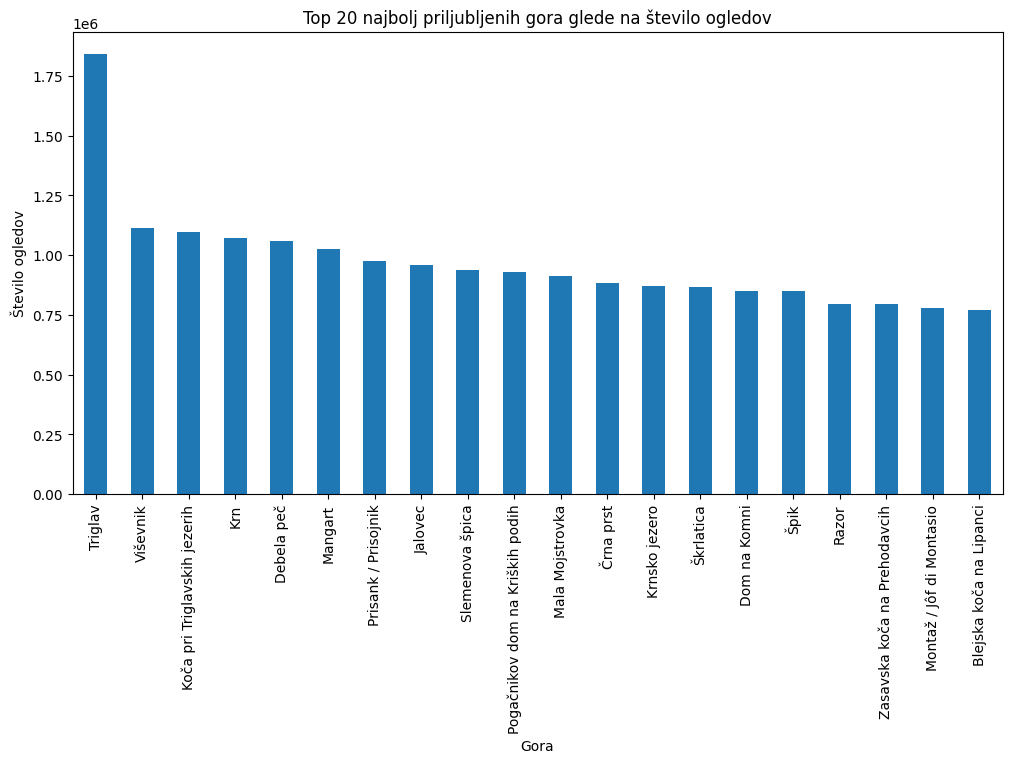

In [17]:
import matplotlib.pyplot as plt

df = pd.read_csv("julijske_alpe_podrobnosti.csv")

df_top20 = df.sort_values("Views", ascending=False).head(20)

df_top20.plot(x="Name", y="Views", kind="bar", figsize=(12,6), legend=False)

plt.title("Top 20 najbolj priljubljenih gora glede na število ogledov")
plt.xlabel("Gora")
plt.ylabel("Število ogledov")
plt.xticks(rotation=90)   
plt.show()

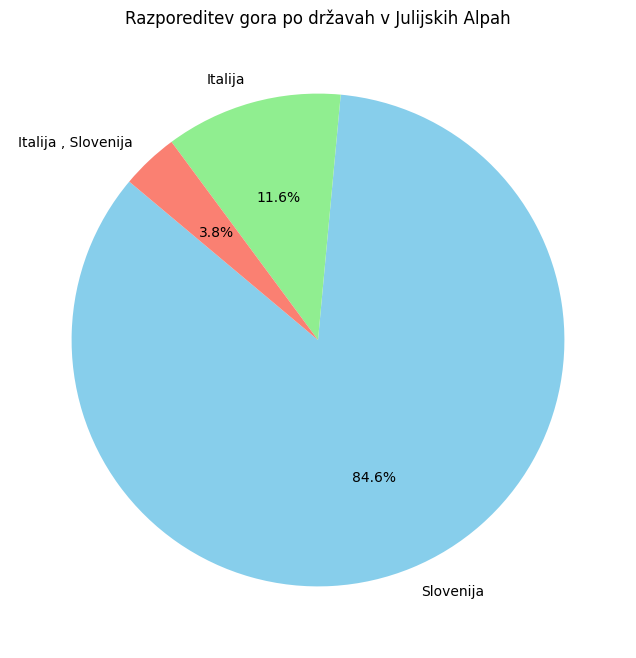

In [ ]:
df = pd.read_csv("julijske_alpe_podrobnosti.csv")

gore_po_drzavah = df['Country'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(gore_po_drzavah, labels=gore_po_drzavah.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title("Razporeditev gora po državah v Julijskih Alpah")
plt.show()

Potem lahko narišemo graf, ki prikazuje gore z največ različnimi potmi.

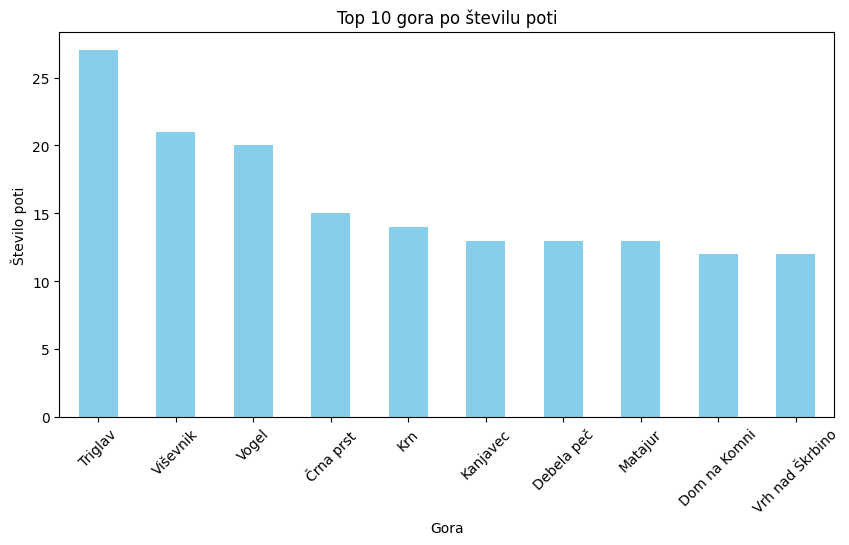

In [ ]:
import matplotlib.pyplot as plt

poti['Gora'] = poti['Ime poti'].apply(lambda x: x.split('-')[-1].split('(')[0].strip())

st_poti_na_goro = poti['Gora'].value_counts()

st_poti_na_goro.head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.ylabel("Število poti")
plt.xlabel("Gora")
plt.title("Top 10 gora po številu poti")
plt.xticks(rotation=45)
plt.show()

Izračunamo kakšen procent predstavljajo neoznačene poti.

In [ ]:

tabela = julijske_alpe[['Ime','Število poti','Število označenih poti']].copy()

tabela['Število neoznačenih poti'] = tabela['Število poti'] - tabela['Število označenih poti']

tabela['% neoznačenih poti'] = (tabela['Število neoznačenih poti'] / tabela['Število poti'] * 100).fillna(0).round(2)

tabela = tabela[['Ime','Število označenih poti','Število neoznačenih poti','% neoznačenih poti']]
tabela

,Ime,Število označenih poti,Število neoznačenih poti,% neoznačenih poti
0,Triglav,20,8,28.57
1,Montaž / Jôf di Montasio,0,3,100.00
2,Škrlatica,5,0,0.00
3,Mali Triglav,2,1,33.33
4,Mangart,5,3,37.50
...,...,...,...,...
581,Gregorčičev slap,0,1,100.00
582,Korita Soče pri Kršovcu,0,1,100.00
583,Slap Veliki Kozjak,0,1,100.00
584,Slap Mali Kozjak,0,1,100.00


In [ ]:
poti = pd.read_csv('poti.csv')
poti = poti.rename(columns={
    'route_name':'Ime poti',
    'route_time':'Čas poti',
    'route_difficulty':'Težavnost poti',
    'start_point':'Začetek poti',
    'height_diff':'Višinska razlika',
    'gear_summer':'Poletna oprema',
    'gear_winter':'Zimska oprema'
})
poti[['Ime poti','Čas poti','Težavnost poti','Začetek poti','Višinska razlika','Poletna oprema','Zimska oprema']]



,Ime poti,Čas poti,Težavnost poti,Začetek poti,Višinska razlika,Poletna oprema,Zimska oprema
0,Aljažev dom v Vratih - Triglav (Tominškova pot),6 h,zelo zahtevna označena pot,Aljažev dom v Vratih (1015 m),1849,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
1,Konec ceste na Pokljuki - Triglav (čez Planiko...,6 h,zelo zahtevna označena pot,Konec ceste na Pokljuki (1340 m),1524,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
2,Dolina Krma - Triglav (čez Kredarico),6 h 10 min,zelo zahtevna označena pot,Dolina Krma (930 m),1934,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
3,Aljažev dom v Vratih - Triglav (čez Plemenice),6 h 30 min,zelo zahtevna označena pot,Aljažev dom v Vratih (1015 m),1849,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
4,Aljažev dom v Vratih - Triglav (čez Prag),6 h 10 min,zelo zahtevna označena pot,Aljažev dom v Vratih (1015 m),1849,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
...,...,...,...,...,...,...,...
1613,Plužna - Slap Virje,10 min,lahka označena pot,Plužna (450 m),50,NaN,NaN
1614,Selce - Gregorčičev slap,1 h,zahtevna neoznačena steza,Selce (382 m),8,čelada,"čelada, cepin, dereze"
1615,Žičnica Golobar - Korita Soče pri Kršovcu,10 min,lahka označena pot,Žičnica Golobar (420 m),30,NaN,NaN
1616,Kobarid - Slap Veliki Kozjak,25 min,lahka označena pot,Kobarid (220 m),30,čelada,čelada


Iz tabele poti izluščimo tiste, pri katerih prehodimo več kot 2000m višinske razlike.

In [54]:

visje = poti[poti['Višinska razlika'] >2000]
visje

,mountain_id,Ime poti,Čas poti,Težavnost poti,Začetek poti,ferata,Višinska razlika,Poletna oprema,Zimska oprema
6,1,Koča pri Savici - Triglav (čez Triglavska jezera),8 h 45 min,zelo zahtevna označena pot,Koča pri Savici (653 m),NaN,2211,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
7,1,Zadnjica - Triglav (čez Dolič),7 h 15 min,zelo zahtevna označena pot,Zadnjica (650 m),NaN,2214,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
14,1,Zadnjica - Triglav (čez Plemenice),7 h 15 min,zelo zahtevna označena pot,Zadnjica (650 m),B/C,2214,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
18,1,Stara Fužina - Triglav (čez Planiko in Mali Tr...,7 h 45 min,zelo zahtevna označena pot,Stara Fužina (600 m),NaN,2264,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
19,1,Zadnjica - Triglav (čez Komar),7 h 15 min,zelo zahtevna označena pot,Zadnjica (650 m),NaN,2214,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
21,1,Stara Fužina - Triglav (čez Planiko in Triglav...,7 h 30 min,zelo zahtevna označena pot,Stara Fužina (600 m),NaN,2264,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
24,1,Zadnjica - Triglav (Kugyjeva pot na Triglav),7 h 30 min,"zelo zahtevna označena pot, zahtevna neoznačen...",Zadnjica (650 m),NaN,2214,"čelada, komplet za samovarovanje, cepin","čelada, komplet za samovarovanje, cepin, derez..."
26,1,Srednja vas - Triglav (Za Ribnico in čez Trigl...,7 h 45 min,zelo zahtevna označena pot,Srednja vas (583 m),NaN,2281,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
32,3,Zadnjica - Škrlatica,8 h 45 min,zelo zahtevna označena pot,Zadnjica (650 m),NaN,2090,"čelada, komplet za samovarovanje, cepin, dereze","čelada, komplet za samovarovanje"
83,14,Korito / Coritis - Visoki Kanin (Via ferrata R...,6 h 50 min,zelo zahtevna označena pot,Korito / Coritis (574 m),B/C,2013,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"


V tabeli lahko poiščemo najdaljšo in najkrajšo pot po času hoje.

In [ ]:
import pandas as pd

df = poti.copy()

def pretvori_cas(vrstica):
    h, m = 0, 0
    if 'h' in vrstica:
        h = int(vrstica.split('h')[0].strip())
        if 'min' in vrstica:
            m = int(vrstica.split('h')[1].replace('min','').strip())
    elif 'min' in vrstica:
        m = int(vrstica.replace('min','').strip())
    return h + m/60

df['Čas ure'] = df['Čas poti'].apply(pretvori_cas)

pot_max = df.loc[df['Čas ure'].idxmax()]
print(f"Najdaljša pot: {pot_max['Ime poti']} – {pot_max['Čas poti']}")

pot_min = df.loc[df['Čas ure'].idxmin()]
print(f"Najkrajša pot: {pot_min['Ime poti']} – {pot_min['Čas poti']}")

Najdaljša pot: Gozd Martuljek  - Škrlatica (grebensko prečenje Mali Oltar-Škrlatica) – 14 h 30 min
Najkrajša pot: Bohinjsko sedlo - Koča na Soriški planini – 5 min


Tabelo lahko prerazporedimo da gre od poti z najmanjšo do poti z največjo prehojeno višinsko razliko.

In [ ]:
poti_sorted = poti.sort_values(by='Višinska razlika', ascending=True)
poti_sorted

,mountain_id,Ime poti,Čas poti,Težavnost poti,Začetek poti,ferata,Višinska razlika,Poletna oprema,Zimska oprema
1596,567,Ribčev Laz - Sveti Janez Krstnik (Ribčev Laz) ...,3 h 15 min,lahka označena pot,Ribčev Laz (532 m),NaN,0,NaN,NaN
1574,549,Kočna - Spominsko obeležje Aleš Kunaver,25 min,lahka neoznačena steza,Kočna (660 m),NaN,0,NaN,"cepin, dereze"
1608,577,Plužna - Izvir Glijuna,10 min,lahka označena pot,Plužna (450 m),NaN,0,NaN,NaN
1429,459,Planina Blato - Planina Blato (krožna pot po F...,7 h,"lahka označena pot, lahka neoznačena steza",Planina Blato (1147 m),NaN,0,NaN,"cepin, dereze"
1341,423,Zgornji Goreljek - Planina Zajamniki,2 h,lahka označena pot,Zgornji Goreljek (1279 m),NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14,1,Zadnjica - Triglav (čez Plemenice),7 h 15 min,zelo zahtevna označena pot,Zadnjica (650 m),B/C,2214,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
19,1,Zadnjica - Triglav (čez Komar),7 h 15 min,zelo zahtevna označena pot,Zadnjica (650 m),NaN,2214,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
18,1,Stara Fužina - Triglav (čez Planiko in Mali Tr...,7 h 45 min,zelo zahtevna označena pot,Stara Fužina (600 m),NaN,2264,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"
21,1,Stara Fužina - Triglav (čez Planiko in Triglav...,7 h 30 min,zelo zahtevna označena pot,Stara Fužina (600 m),NaN,2264,"čelada, komplet za samovarovanje","čelada, komplet za samovarovanje, cepin, dereze"


In [ ]:

poti_abecedno = poti.sort_values(by='Ime poti', ascending=True).reset_index(drop=True)
poti_abecedno

,mountain_id,Ime poti,Čas poti,Težavnost poti,Začetek poti,ferata,Višinska razlika,Poletna oprema,Zimska oprema
0,273,2. serpentina vršiške ceste - Kumlehova glava ...,2 h 45 min,zahtevna neoznačena steza,2. serpentina vršiške ceste (930 m),NaN,858,NaN,"cepin, dereze"
1,334,2. serpentina vršiške ceste - Visoki Mavrinc (...,2 h,lahka neoznačena steza,2. serpentina vršiške ceste (930 m),NaN,632,NaN,"cepin, dereze"
2,408,2. serpentina vršiške ceste - Škrbinjek,1 h,lahka neoznačena steza,2. serpentina vršiške ceste (930 m),NaN,411,NaN,"cepin, dereze"
3,500,Ahlete / Aclete - Spodnje Mangartsko jezero,50 min,lahka označena pot,Ahlete / Aclete (850 m),NaN,74,NaN,NaN
4,499,Ahlete / Aclete - Zgornje Mangartsko jezero,1 h 5 min,lahka označena pot,Ahlete / Aclete (850 m),NaN,79,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1613,155,Žabnice / Camporosso in Valcanale - Kamniti lo...,3 h 30 min,zahtevna označena pot,Žabnice / Camporosso in Valcanale (858 m),NaN,1213,čelada,"čelada, cepin, dereze"
1614,281,Žabnice / Camporosso in Valcanale - Svete Viša...,2 h 30 min,lahka označena pot,Žabnice / Camporosso in Valcanale (858 m),NaN,908,NaN,NaN
1615,333,Žabnice / Camporosso in Valcanale - Višarska p...,2 h,lahka označena pot,Žabnice / Camporosso in Valcanale (858 m),NaN,712,NaN,NaN
1616,553,Želeče (Bled) - Straža (Riklijeva pot),30 min,lahka označena pot,Želeče (Bled) (510 m),NaN,136,NaN,dereze
